# Run-pass ratios and efficiency

In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [25]:
year = 2022
### Play-By-Play data for 2022
df_pbp_2022 = nfl.import_pbp_data(years=[year])

### Players
df_players = nfl.import_rosters([year])
### Teams
df_teams = nfl.import_team_desc()

2022 done.
Downcasting floats.


In [26]:
set(df_pbp_2022['game_date'])

{'2022-09-08', '2022-09-11', '2022-09-12', '2022-09-15', '2022-09-18'}

In [27]:
set(df_pbp_2022['week'])

{1, 2}

In [28]:
cols = list(nfl.see_pbp_cols())

In [29]:
cols

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

## NFL average

In [30]:
no_runs = np.count_nonzero(df_pbp_2022['play_type']=='run')
no_passes = np.count_nonzero(df_pbp_2022['play_type']=='pass')
ratio = no_runs/no_passes

In [31]:
labels = ['Run','Pass']
values = [no_runs, no_passes]

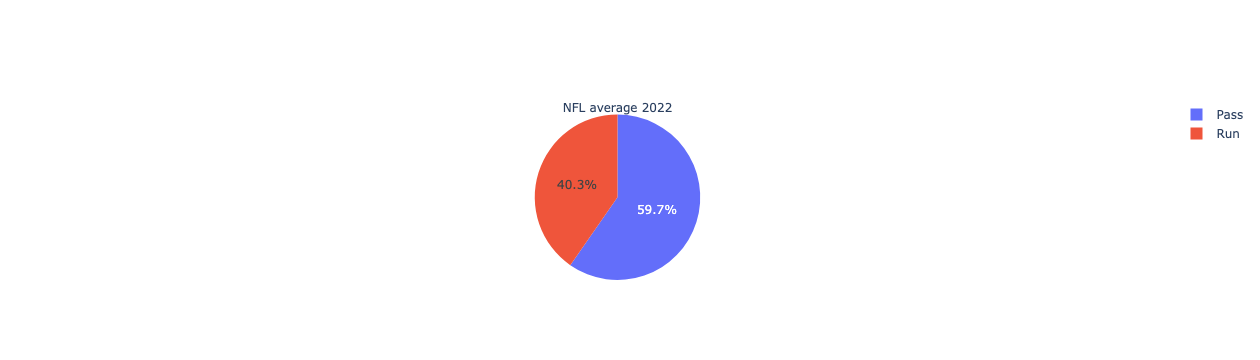

In [32]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title=f'NFL average {year}')])
fig.show()

In [33]:
print(f'NFL average run:pass ratio in {year} = '+str(np.round(no_runs/no_passes,2)))

NFL average run:pass ratio in 2022 = 0.68


## Per team

In [34]:
df_runs = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='run').sum()).reset_index(name='no of runs')
df_passes = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='pass').sum()).reset_index(name='no of passes')

In [35]:
df_run_pass = df_runs.merge(df_passes, on="posteam")

In [36]:
df_run_pass = df_run_pass.merge(df_teams[["team_abbr", "team_color", "team_color2"]], left_on="posteam", right_on="team_abbr")

In [37]:
df_run_pass['run pct'] = df_run_pass['no of runs']/(df_run_pass['no of runs']+df_run_pass['no of passes'])*100
df_run_pass['pass pct'] = df_run_pass['no of passes']/(df_run_pass['no of runs']+df_run_pass['no of passes'])*100
df_run_pass['run-pass ratio'] = df_run_pass['no of runs']/df_run_pass['no of passes']

### Who runs/passes the most?

In [38]:
df_run_pass.sort_values(by=['run-pass ratio'])

,posteam,no of runs,no of passes,team_abbr,team_color,team_color2,run pct,pass pct,run-pass ratio
24,NYJ,36,109,NYJ,#003F2D,#000000,24.827586,75.172414,0.330275
18,LV,34,84,LV,#000000,#A5ACAF,28.813559,71.186441,0.404762
19,MIA,39,87,MIA,#008E97,#F58220,30.952381,69.047619,0.448276
31,WAS,46,97,WAS,#5A1414,#FFB612,32.167832,67.832168,0.474227
27,SEA,30,63,SEA,#002244,#69be28,32.258065,67.741935,0.476190
22,NO,40,83,NO,#D3BC8D,#000000,32.520325,67.479675,0.481928
16,LA,44,85,LA,#003594,#FFD100,34.108527,65.891473,0.517647
0,ARI,50,94,ARI,#97233F,#000000,34.722222,65.277778,0.531915
12,HOU,44,81,HOU,#03202F,#A71930,35.200000,64.800000,0.543210
6,CIN,58,104,CIN,#FB4F14,#000000,35.802469,64.197531,0.557692


#### Yards per run/pass

In [39]:
df_total_yds = df_pbp_2022.groupby(['play_type','posteam'])['yards_gained'].sum()

In [40]:
df_run_pass = df_run_pass.merge(df_total_yds['run'], on="posteam")
df_run_pass = df_run_pass.merge(df_total_yds['pass'], on="posteam",suffixes=('_run','_pass'))

In [41]:
df_run_pass['yds_per_run'] = df_run_pass['yards_gained_run'].values/df_run_pass['no of runs'].values
df_run_pass['yds_per_pass_attempt'] = df_run_pass['yards_gained_pass'].values/df_run_pass['no of passes'].values

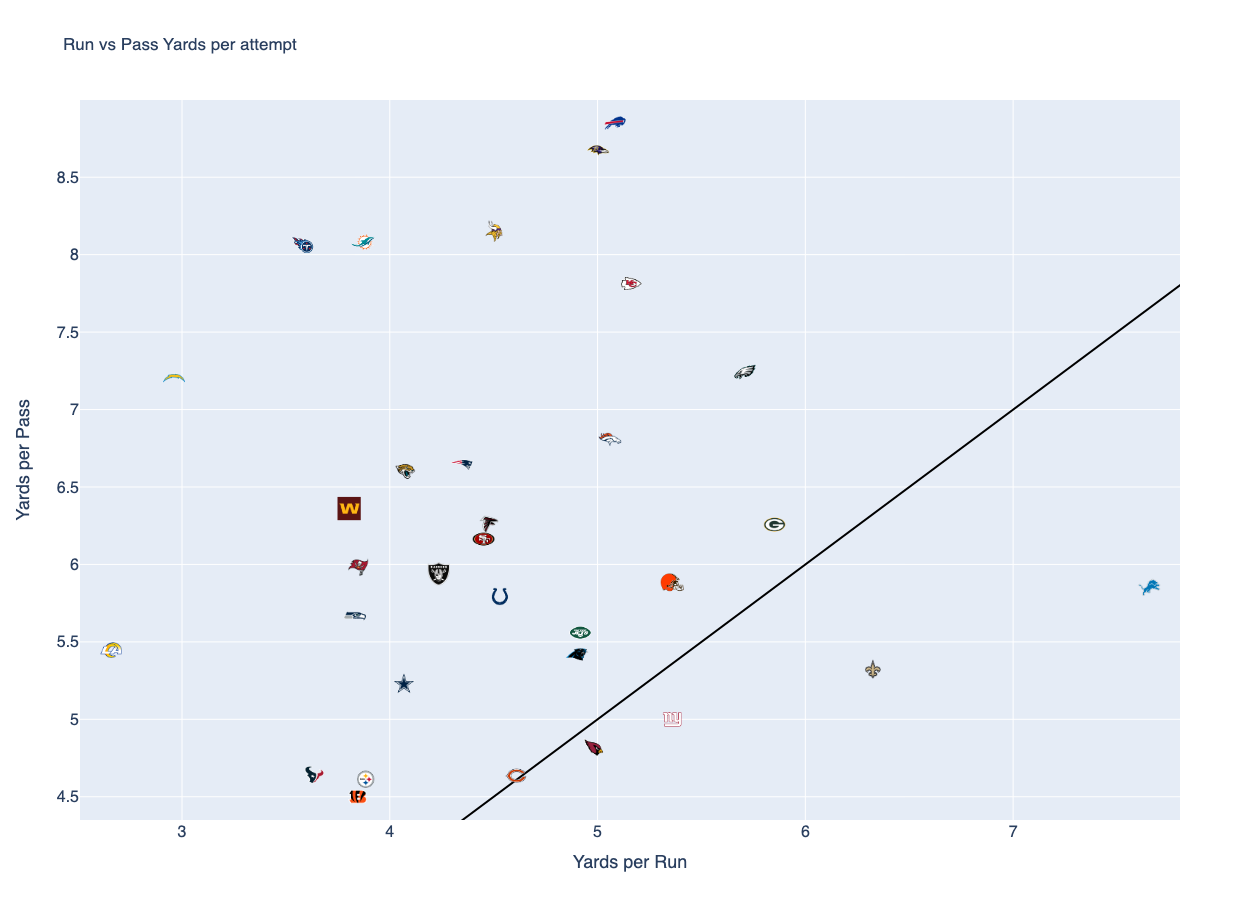

In [42]:
fig = go.Figure()

dx=0.15
marginx=0.15
marginy=0.15

for i,team in enumerate(df_run_pass['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass['yds_per_run'][i], 
            y=df_run_pass['yds_per_pass_attempt'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_run'][i]], 
            y=[df_run_pass['yds_per_pass_attempt'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
x=np.linspace(0,10)
y=np.linspace(0,10)

fig.add_trace(
        go.Scatter(
            x=x, 
            y=y, 
            name='1x1', 
            mode="lines",
            line = dict(color='black')
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )

fig.update_xaxes(range=[np.nanmin(df_run_pass['yds_per_run'])-marginx, np.nanmax(df_run_pass['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['yds_per_pass_attempt'])-marginy, np.nanmax(df_run_pass['yds_per_pass_attempt'])+marginy])
                    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run vs Pass Yards per attempt',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Yards per Pass",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=900,
    width=1000,
    showlegend=False
)
        
fig.show()

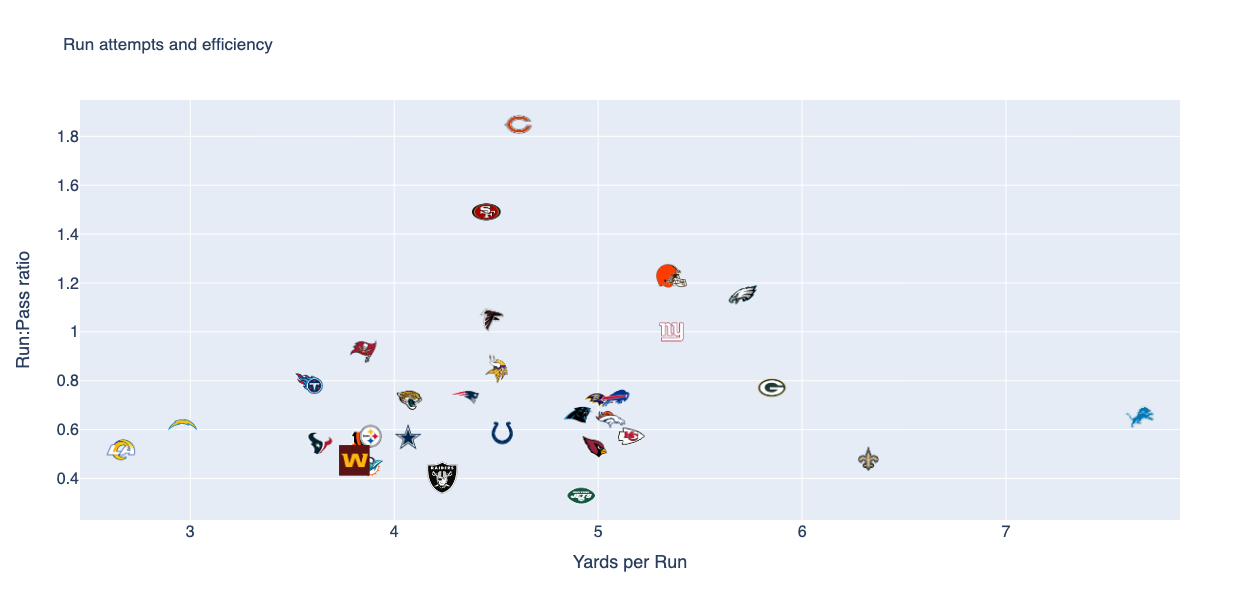

In [48]:
fig = go.Figure()

dx=0.15
marginx=0.2
marginy=0.1

for i,team in enumerate(df_run_pass['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass['yds_per_run'][i], 
            y=df_run_pass['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_run'][i]], 
            y=[df_run_pass['run-pass ratio'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass['yds_per_run'])-marginx, np.nanmax(df_run_pass['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['run-pass ratio'])-marginy, np.nanmax(df_run_pass['run-pass ratio'])+marginy])
 

fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run attempts and efficiency',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

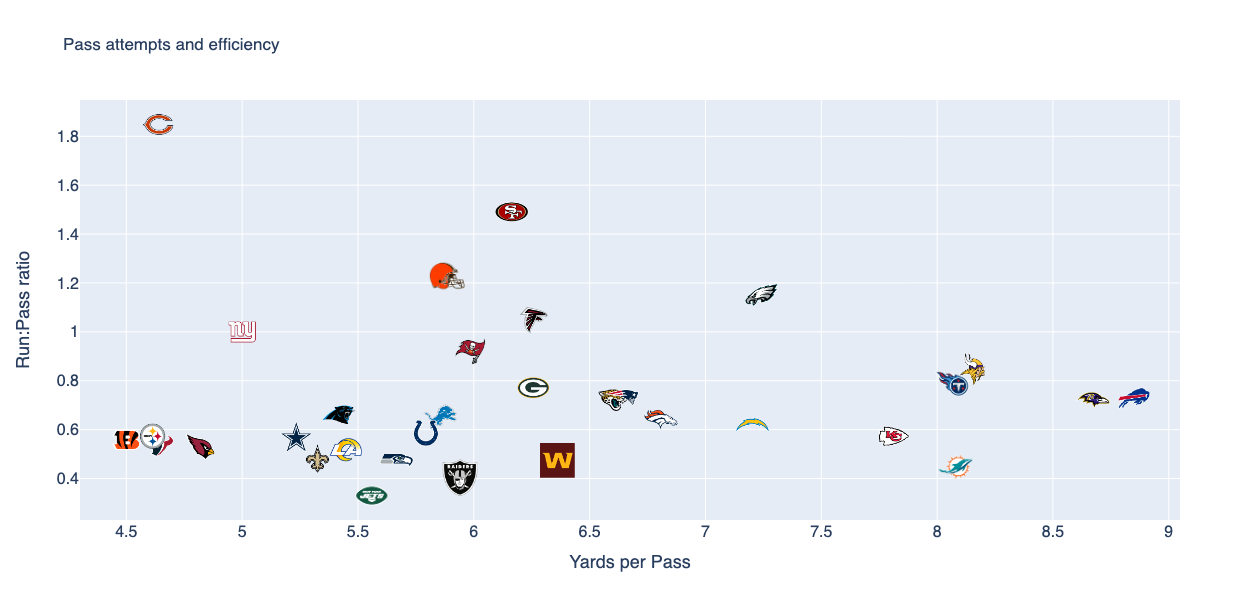

In [49]:
fig = go.Figure()

dx=0.15
marginx=0.2
marginy=0.1

for i,team in enumerate(df_run_pass['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass['yds_per_pass_attempt'][i], 
            y=df_run_pass['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_pass_attempt'][i]], 
            y=[df_run_pass['run-pass ratio'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass['yds_per_pass_attempt'])-marginx, np.nanmax(df_run_pass['yds_per_pass_attempt'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['run-pass ratio'])-marginy, np.nanmax(df_run_pass['run-pass ratio'])+marginy])
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Pass attempts and efficiency',
    xaxis_title_text="Yards per Pass",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

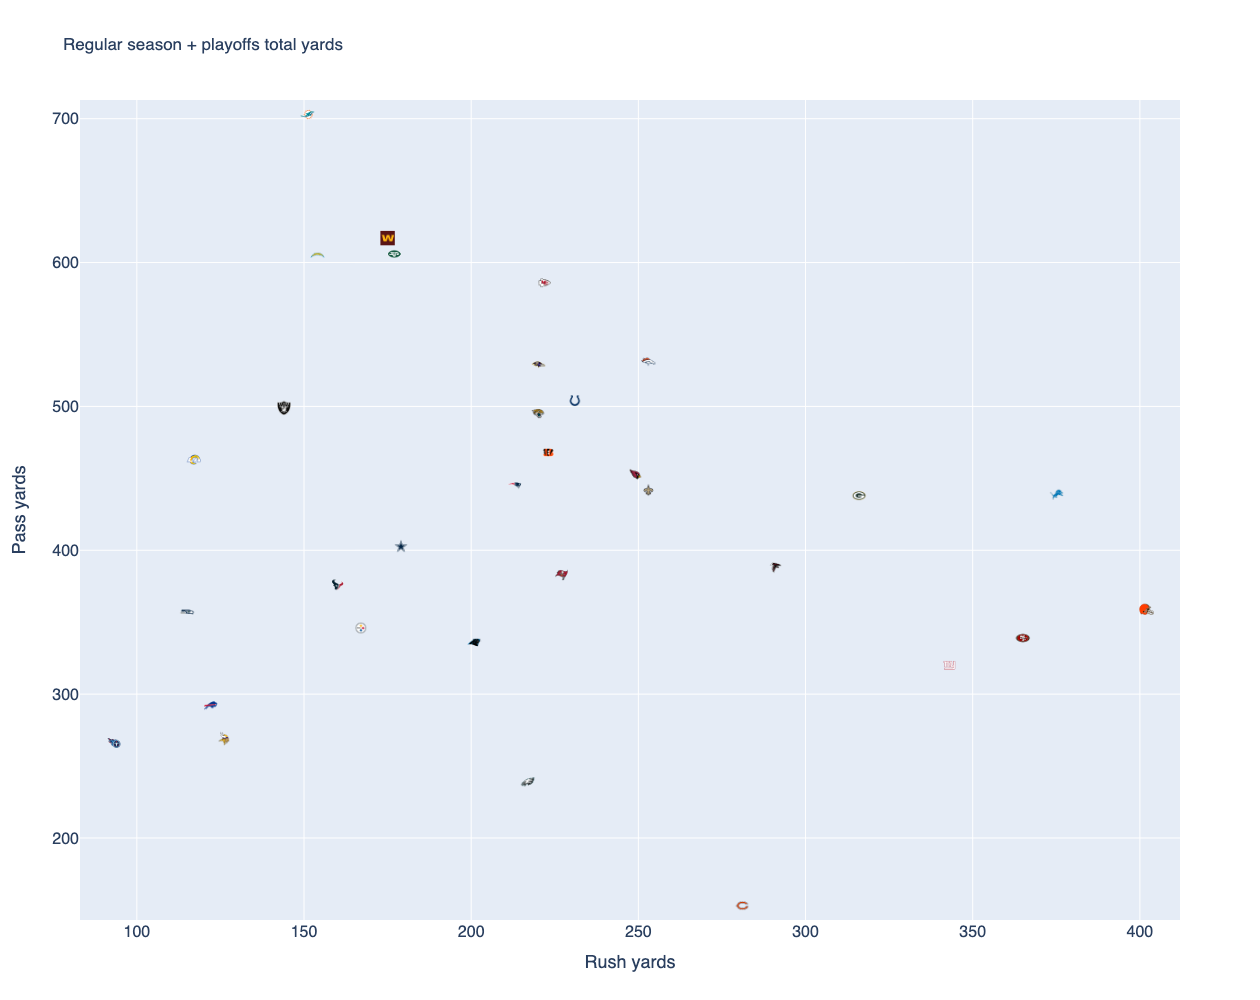

In [50]:
fig = go.Figure()

dx=10
marginx=10
marginy=10

for i,team in enumerate(df_run_pass['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass['yards_gained_run'][i], 
            y=df_run_pass['yards_gained_pass'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yards_gained_run'][i]], 
            y=[df_run_pass['yards_gained_pass'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass['yards_gained_run'])-marginx, np.nanmax(df_run_pass['yards_gained_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['yards_gained_pass'])-marginy, np.nanmax(df_run_pass['yards_gained_pass'])+marginy])

# for i in range(len(df_run_pass)):
#     fig.add_trace(
#         go.Scatter(
#             x=[df_run_pass['yards_gained_run'][i]], 
#             y=[df_run_pass['yards_gained_pass'][i]], 
#             name=df_run_pass['posteam'][i], 
#             mode="markers", 
#             marker=dict(size=15,
#                         color=df_run_pass['team_color'][i],
#                         symbol=df_run_pass['marker_style'][i])
#             # fill=df_run_pass['team_color'][i],
#             # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
#         )
#     )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Regular season + playoffs total yards',
    xaxis_title_text="Rush yards",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Pass yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000,
    showlegend=False
)
        
fig.show()

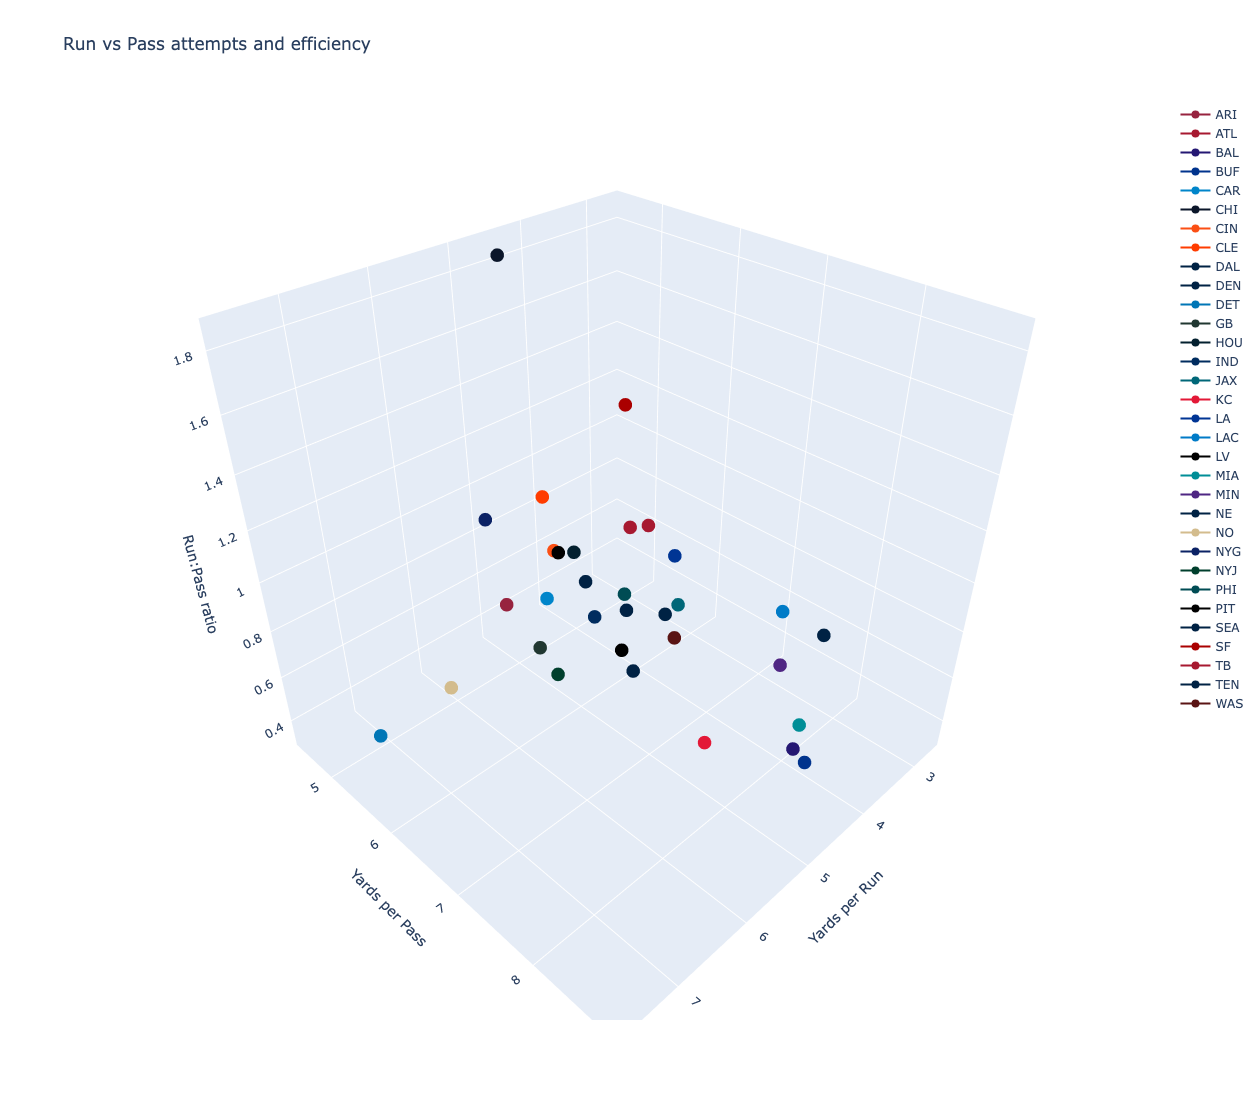

In [46]:
fig = go.Figure()

for i in range(len(df_run_pass)):
    fig.add_trace(
        go.Scatter3d(x=[df_run_pass['yds_per_run'][i]], 
                     y=[df_run_pass['yds_per_pass_attempt'][i]],
                     z=[df_run_pass['run-pass ratio'][i]],
                     name=df_run_pass['posteam'][i], 
                    # mode="markers", 
                    marker=dict(size=8,
                        color=df_run_pass['team_color'][i])))
# fig.update_layout(
#     font_family="Averta, sans-serif",
#     hoverlabel_font_family="Averta, sans-serif",
#     xaxis_title_text="Yards per Run",
#     xaxis_title_font_size=18,
#     xaxis_tickfont_size=16,
#     yaxis_title_text="Yards per Pass",
#     yaxis_title_font_size=18,
#     yaxis_tickfont_size=16,
#     hoverlabel_font_size=16,
#     legend_font_size=16,
#     height=1000,
#     width=1000
# )

fig.update_layout(scene_aspectmode='cube',
                  title='Run vs Pass attempts and efficiency',
                 scene = dict(
                    xaxis_title='Yards per Run',
                    yaxis_title='Yards per Pass',
                    zaxis_title='Run:Pass ratio'),
                 width=1100,
                 height=1100)


fig.show()

## When up vs. when down

In [24]:
df_pbp_2022['score_differential']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
50707   -3.0
50708    NaN
50709   -3.0
50710    3.0
50711    NaN
Name: score_differential, Length: 50712, dtype: float32

## Redzone